**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**
---
# Ejercicio 3: Programación Lineal

**Objetivo:** Resolver problemas de optimización utilizando programación lineal para maximizar beneficios empresariales

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## Enunciado Completo

Usted es el director del departamento de gestión de **Techint**. Debe coordinar la producción de 3 bienes: **acero (A)**, **cobre (C)** y **hierro (H)**.

**Datos del problema:**
- **Beneficios por tonelada**: Acero $5 millones, Cobre $10 millones, Hierro $9 millones
- **Capacidad de almacenamiento**: 1200 toneladas total
- **Presupuesto**: $1500 millones
- **Costos de producción por tonelada**: Acero $2 millones, Cobre $3 millones, Hierro $4 millones

**Variables de decisión:**
- x_A = cantidad de acero a producir (toneladas)
- x_C = cantidad de cobre a producir (toneladas)  
- x_H = cantidad de hierro a producir (toneladas)

**Función objetivo:** Maximizar beneficio total Z = 5x_A + 10x_C + 9x_H

**Restricciones:**
1. Capacidad de almacenamiento: x_A + x_C + x_H ≤ 1200
2. Restricción presupuestaria: 2x_A + 3x_C + 4x_H ≤ 1500
3. No negatividad: x_A, x_C, x_H ≥ 0

**Se solicita:**
1. Resolver el problema de optimización usando Python
2. Interpretar la solución óptima
3. Analizar qué restricción es más limitante
4. Graficar la distribución óptima de la producción
5. Analizar el impacto del aumento del tipo de cambio

## Resolución Literal

### Paso 1: Definir parámetros del problema

In [26]:
# Definir parámetros del problema

# Beneficios por tonelada
beneficios_acero = 5      # $5 millones por tonelada
beneficios_cobre = 10     # $10 millones por tonelada
beneficios_hierro = 9     # $9 millones por tonelada

beneficios = np.array([beneficios_acero, beneficios_cobre, beneficios_hierro])
print("Beneficios por tonelada:")
print(f"  Acero: ${beneficios_acero} millones/ton")
print(f"  Cobre: ${beneficios_cobre} millones/ton") 
print(f"  Hierro: ${beneficios_hierro} millones/ton")

# Costos de producción por tonelada
costos_acero = 2      # $2 millones por tonelada
costos_cobre = 3      # $3 millones por tonelada
costos_hierro = 4     # $4 millones por tonelada

print(f"\nCostos de producción:")
print(f"  Acero: ${costos_acero} millones/ton")
print(f"  Cobre: ${costos_cobre} millones/ton")
print(f"  Hierro: ${costos_hierro} millones/ton")

Beneficios por tonelada:
  Acero: $5 millones/ton
  Cobre: $10 millones/ton
  Hierro: $9 millones/ton

Costos de producción:
  Acero: $2 millones/ton
  Cobre: $3 millones/ton
  Hierro: $4 millones/ton


### Paso 2: Configurar el problema de optimización

**b) Maximización de la función de beneficio - Solución óptima**

Resolvemos el problema de programación lineal para encontrar las cantidades óptimas de producción.

In [27]:
# b) Resolvemos el problema de optimización

print("b) RESOLVIENDO EL PROBLEMA DE OPTIMIZACIÓN:")
print("="*50)

# Aplicamos el algoritmo de programación lineal
# Esto encuentra automáticamente la mejor combinación de productos
resultado = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')

# Verificamos si encontró una solución
if resultado.success:
    # Extraemos los resultados
    toneladas_acero = resultado.x[0]
    toneladas_cobre = resultado.x[1] 
    toneladas_hierro = resultado.x[2]
    beneficio_total = -resultado.fun  # Negativo porque convertimos el problema
    
    print("✅ ¡SOLUCIÓN ENCONTRADA!")
    print()
    print("Cantidades óptimas a producir:")
    print(f"  🔩 Acero: {toneladas_acero:.1f} toneladas")
    print(f"  🟠 Cobre: {toneladas_cobre:.1f} toneladas")
    print(f"  ⚫ Hierro: {toneladas_hierro:.1f} toneladas")
    print()
    print(f"💰 Beneficio máximo total: ${beneficio_total:,.1f} millones")
    
    # Verificamos qué tan cerca estamos de los límites
    print("\n📊 Verificación de uso de recursos:")
    
    # Capacidad de almacenamiento
    capacidad_usada = toneladas_acero + toneladas_cobre + toneladas_hierro
    porcentaje_capacidad = (capacidad_usada / 1200) * 100
    print(f"  Almacenamiento: {capacidad_usada:.1f}/1200 toneladas ({porcentaje_capacidad:.1f}%)")
    
    # Presupuesto utilizado
    presupuesto_usado = (costos_acero * toneladas_acero + 
                        costos_cobre * toneladas_cobre + 
                        costos_hierro * toneladas_hierro)
    porcentaje_presupuesto = (presupuesto_usado / 1500) * 100
    print(f"  Presupuesto: ${presupuesto_usado:.1f}/1500 millones ({porcentaje_presupuesto:.1f}%)")
    
    # Guardamos los resultados para usar después
    x_optimo = resultado.x
    beneficio_maximo = beneficio_total
    
    # Identificamos qué limitación nos está restringiendo más
    print("\n🔍 Análisis de limitaciones:")
    if porcentaje_capacidad > 99:
        print("  ⚠️  El almacenamiento está al límite")
    if porcentaje_presupuesto > 99:
        print("  ⚠️  El presupuesto está al límite")
    
else:
    print("❌ Error: No se pudo encontrar una solución")
    print(f"Razón: {resultado.message}")

b) RESOLVIENDO EL PROBLEMA DE OPTIMIZACIÓN:
✅ ¡SOLUCIÓN ENCONTRADA!

Cantidades óptimas a producir:
  🔩 Acero: 0.0 toneladas
  🟠 Cobre: 500.0 toneladas
  ⚫ Hierro: 0.0 toneladas

💰 Beneficio máximo total: $5,000.0 millones

📊 Verificación de uso de recursos:
  Almacenamiento: 500.0/1200 toneladas (41.7%)
  Presupuesto: $1500.0/1500 millones (100.0%)

🔍 Análisis de limitaciones:
  ⚠️  El presupuesto está al límite


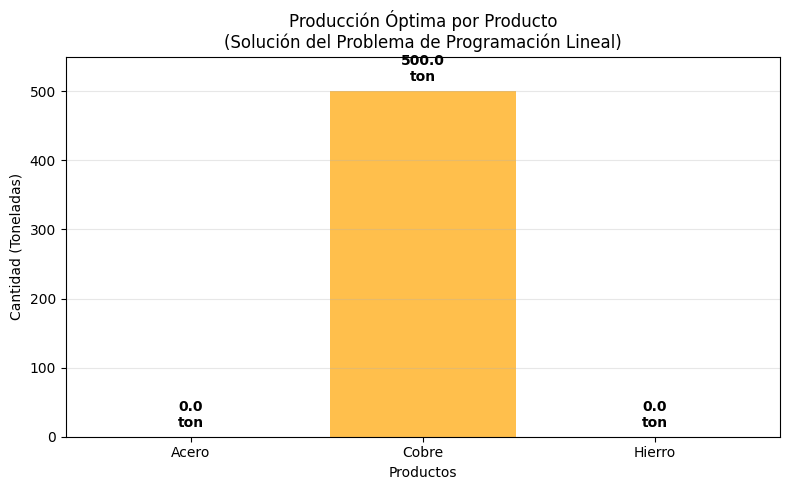

Producción total: 500.00 toneladas
Utilización de capacidad: 41.7%


In [28]:
# Gráfico de barras con las cantidades óptimas de producción

if resultado.success:
    productos = ['Acero', 'Cobre', 'Hierro']
    cantidades_optimas = x_optimo
    colores = ['gray', 'orange', 'brown']
    
    # Gráfico de barras
    plt.figure(figsize=(8, 5))
    barras = plt.bar(productos, cantidades_optimas, color=colores, alpha=0.7)
    
    # Agregamos etiquetas con valores
    for i, valor in enumerate(cantidades_optimas):
        plt.text(i, valor + 10, f'{valor:.1f}\nton', ha='center', va='bottom', fontweight='bold')
    
    plt.title('Producción Óptima por Producto\n(Solución del Problema de Programación Lineal)')
    plt.xlabel('Productos')
    plt.ylabel('Cantidad (Toneladas)')
    plt.grid(True, axis='y', alpha=0.3)
    plt.ylim(0, max(cantidades_optimas) + 50)
    
    plt.tight_layout()
    plt.show()
    
    # Información adicional
    produccion_total = cantidades_optimas.sum()
    print(f"Producción total: {produccion_total:.2f} toneladas")
    print(f"Utilización de capacidad: {produccion_total/1200*100:.1f}%")

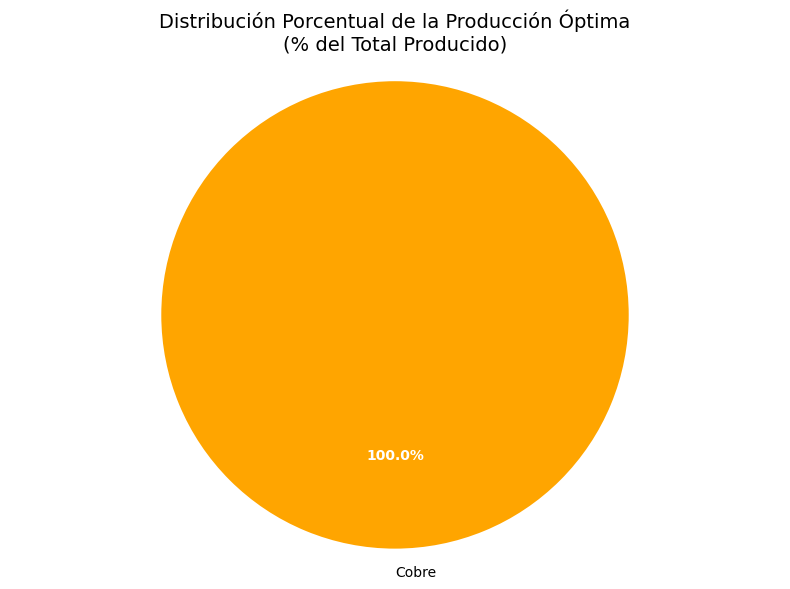

Distribución porcentual de la producción:
   Acero: No se produce (0.0%)
   Cobre: 500.0 ton (100.0%)
   Hierro: No se produce (0.0%)


In [29]:
# Gráfico de torta con el porcentaje de producción de cada bien

if resultado.success:
    # Calculamos los porcentajes de producción
    produccion_total = cantidades_optimas.sum()
    porcentajes = (cantidades_optimas / produccion_total) * 100
    
    # Filtramos productos con producción > 0 para el gráfico de torta
    productos_producidos = []
    cantidades_producidas = []
    porcentajes_producidos = []
    colores_producidos = []
    
    for i, (producto, cantidad, porcentaje) in enumerate(zip(productos, cantidades_optimas, porcentajes)):
        if cantidad > 0.01:  # Solo incluir si la producción es significativa
            productos_producidos.append(producto)
            cantidades_producidas.append(cantidad)
            porcentajes_producidos.append(porcentaje)
            colores_producidos.append(colores[i])
    
    # Gráfico de torta
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(porcentajes_producidos, 
                                      labels=productos_producidos,
                                      colors=colores_producidos,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=[0.05] * len(productos_producidos))  # Pequeña separación
    
    plt.title('Distribución Porcentual de la Producción Óptima\n(% del Total Producido)', fontsize=14)
    
    # Mejoramos el formato del texto
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.axis('equal')  # Para que el círculo sea perfecto
    plt.tight_layout()
    plt.show()
    
    # Resumen numérico
    print("Distribución porcentual de la producción:")
    for producto, cantidad, porcentaje in zip(productos, cantidades_optimas, porcentajes):
        if cantidad > 0.01:
            print(f"   {producto}: {cantidad:.1f} ton ({porcentaje:.1f}%)")
        else:
            print(f"   {producto}: No se produce (0.0%)")

**c) Gráfico del espacio de soluciones factibles**

Visualizamos la región factible y la solución óptima en el espacio de dos dimensiones (simplificando a dos productos para visualización).

c) VISUALIZACIÓN DEL ESPACIO DE SOLUCIONES:
Para entender mejor el problema, vamos a graficarlo
Nota: Simplificaremos mostrando solo Acero vs Cobre (asumiendo Hierro = 0)


/tmp/ipykernel_230295/1927747369.py:36: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(acero_mesh, cobre_mesh, region_posible.astype(int),


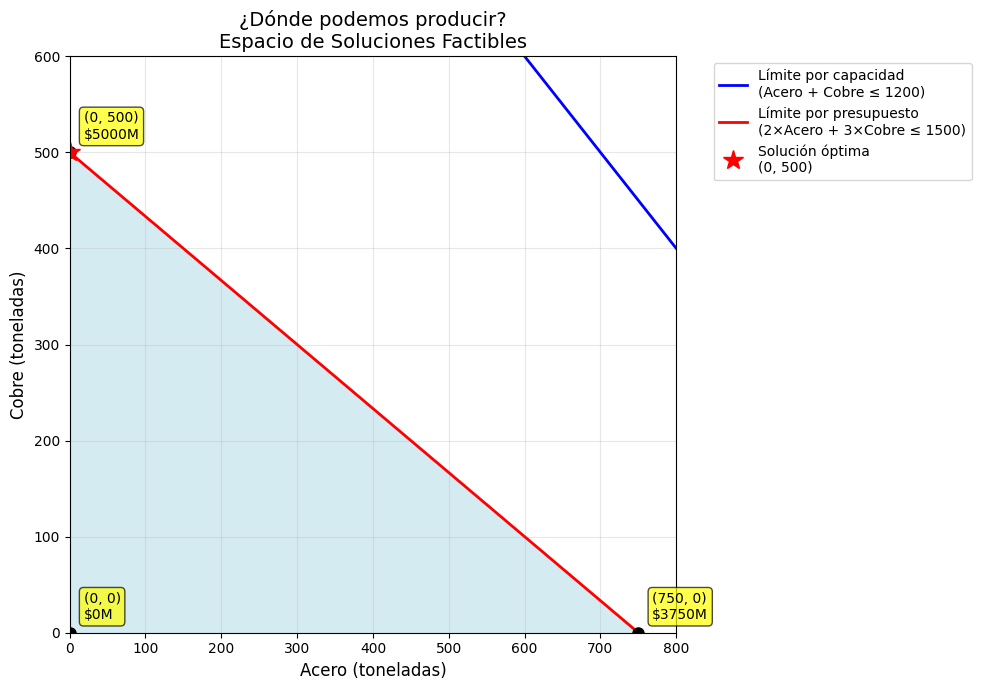


💡 Interpretación del gráfico:
  📘 Zona azul = Todas las combinaciones posibles de producción
  🔵 Línea azul = Límite por espacio de almacenamiento
  🔴 Línea roja = Límite por dinero disponible
  ⚫ Puntos negros = Esquinas de la región (candidatos a solución óptima)
  ⭐ Estrella roja = Mejor solución encontrada


In [30]:
# c) Gráfico del espacio de soluciones factibles (versión simplificada)

print("c) VISUALIZACIÓN DEL ESPACIO DE SOLUCIONES:")
print("="*50)
print("Para entender mejor el problema, vamos a graficarlo")
print("Nota: Simplificaremos mostrando solo Acero vs Cobre (asumiendo Hierro = 0)")

# Creamos un rango de valores para graficar
acero_valores = np.linspace(0, 800, 100)

# Calculamos las limitaciones
# Limitación 1: Si solo producimos acero y cobre, ¿cuánto cobre podemos hacer?
# acero + cobre ≤ 1200, entonces: cobre ≤ 1200 - acero
cobre_por_capacidad = 1200 - acero_valores

# Limitación 2: Si consideramos el presupuesto
# 2*acero + 3*cobre ≤ 1500, entonces: cobre ≤ (1500 - 2*acero) / 3
cobre_por_presupuesto = (1500 - 2*acero_valores) / 3

# Creamos el gráfico
plt.figure(figsize=(10, 7))

# Graficamos las líneas de limitación
plt.plot(acero_valores, cobre_por_capacidad, 'b-', linewidth=2, 
         label='Límite por capacidad\n(Acero + Cobre ≤ 1200)')
plt.plot(acero_valores, cobre_por_presupuesto, 'r-', linewidth=2, 
         label='Límite por presupuesto\n(2×Acero + 3×Cobre ≤ 1500)')

# Sombreamos la región donde SÍ podemos producir (región factible)
# Esta es la zona donde se cumplen TODAS las restricciones
acero_mesh, cobre_mesh = np.meshgrid(np.linspace(0, 800, 200), np.linspace(0, 600, 200))
region_posible = ((cobre_mesh <= 1200 - acero_mesh) & 
                  (cobre_mesh <= (1500 - 2*acero_mesh) / 3) & 
                  (acero_mesh >= 0) & (cobre_mesh >= 0))

plt.contourf(acero_mesh, cobre_mesh, region_posible.astype(int), 
            levels=[0.5, 1.5], colors=['lightblue'], alpha=0.5, 
            label='Región factible\n(zona donde SÍ podemos producir)')

# Marcamos algunos puntos importantes
puntos_esquina = [(0, 0), (0, 500), (750, 0)]
for punto in puntos_esquina:
    plt.plot(punto[0], punto[1], 'ko', markersize=8)
    beneficio_punto = 5*punto[0] + 10*punto[1]  # Solo acero y cobre
    plt.annotate(f'{punto}\n${beneficio_punto}M', 
                xy=punto, xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Si la solución tiene hierro ≈ 0, la marcamos
if resultado.success and abs(x_optimo[2]) < 1:
    plt.plot(x_optimo[0], x_optimo[1], 'r*', markersize=15, 
             label=f'Solución óptima\n({x_optimo[0]:.0f}, {x_optimo[1]:.0f})')

# Configuramos el gráfico
plt.xlim(0, 800)
plt.ylim(0, 600)
plt.xlabel('Acero (toneladas)', fontsize=12)
plt.ylabel('Cobre (toneladas)', fontsize=12)
plt.title('¿Dónde podemos producir?\nEspacio de Soluciones Factibles', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n💡 Interpretación del gráfico:")
print("  📘 Zona azul = Todas las combinaciones posibles de producción")
print("  🔵 Línea azul = Límite por espacio de almacenamiento") 
print("  🔴 Línea roja = Límite por dinero disponible")
print("  ⚫ Puntos negros = Esquinas de la región (candidatos a solución óptima)")
print("  ⭐ Estrella roja = Mejor solución encontrada")

**d) Impacto del aumento del tipo de cambio**

Los costos de producción aumentan:
- Acero: +90% (de $2 a $3.8 millones/ton)
- Cobre: +60% (de $3 a $4.8 millones/ton) 
- Hierro: +50% (de $4 a $6 millones/ton)

In [31]:
# d) ¿Qué pasa si aumenta el tipo de cambio? (Análisis de sensibilidad)

print("d) IMPACTO DEL AUMENTO DEL TIPO DE CAMBIO:")
print("="*50)
print("El dólar se dispara y los costos de producción aumentan...")

# Definimos los nuevos costos (más caros por el tipo de cambio)
print("\n📈 Aumentos en los costos de producción:")
aumento_acero = 90   # +90%
aumento_cobre = 60   # +60% 
aumento_hierro = 50  # +50%

costos_nuevos_acero = costos_acero * (1 + aumento_acero/100)
costos_nuevos_cobre = costos_cobre * (1 + aumento_cobre/100)
costos_nuevos_hierro = costos_hierro * (1 + aumento_hierro/100)

print(f"  Acero: ${costos_acero} → ${costos_nuevos_acero:.1f} millones/ton (+{aumento_acero}%)")
print(f"  Cobre: ${costos_cobre} → ${costos_nuevos_cobre:.1f} millones/ton (+{aumento_cobre}%)")
print(f"  Hierro: ${costos_hierro} → ${costos_nuevos_hierro:.1f} millones/ton (+{aumento_hierro}%)")

# Resolvemos el problema con los nuevos costos
costos_nuevos = np.array([costos_nuevos_acero, costos_nuevos_cobre, costos_nuevos_hierro])

# Nueva restricción presupuestaria (la capacidad sigue igual)
A_ub_nuevo = np.array([
    [1, 1, 1],         # Capacidad: sigue siendo 1200 toneladas máximo
    costos_nuevos      # Presupuesto: ahora con costos más altos
])

b_ub_nuevo = np.array([1200, 1500])  # Los límites no cambian

print("\n🔄 Resolviendo con los nuevos costos...")

# Resolvemos el nuevo problema (los beneficios no cambian, solo los costos)
resultado_nuevo = linprog(c, A_ub=A_ub_nuevo, b_ub=b_ub_nuevo, bounds=x_bounds, method='highs')

if resultado_nuevo.success:
    toneladas_acero_nuevo = resultado_nuevo.x[0]
    toneladas_cobre_nuevo = resultado_nuevo.x[1] 
    toneladas_hierro_nuevo = resultado_nuevo.x[2]
    beneficio_total_nuevo = -resultado_nuevo.fun
    
    print("✅ Nueva solución encontrada:")
    print(f"  🔩 Acero: {toneladas_acero_nuevo:.1f} toneladas")
    print(f"  🟠 Cobre: {toneladas_cobre_nuevo:.1f} toneladas") 
    print(f"  ⚫ Hierro: {toneladas_hierro_nuevo:.1f} toneladas")
    print(f"  💰 Nuevo beneficio: ${beneficio_total_nuevo:,.1f} millones")
    
    # Calculamos cuánto perdimos
    print("\n📉 ¿En cuánto disminuyó la producción?")
    productos = ['Acero', 'Cobre', 'Hierro']
    produccion_antes = [toneladas_acero, toneladas_cobre, toneladas_hierro]
    produccion_despues = [toneladas_acero_nuevo, toneladas_cobre_nuevo, toneladas_hierro_nuevo]
    
    for i, producto in enumerate(productos):
        cambio = produccion_despues[i] - produccion_antes[i]
        if produccion_antes[i] > 0:
            porcentaje_cambio = (cambio / produccion_antes[i]) * 100
            print(f"  {producto}: {produccion_antes[i]:.1f} → {produccion_despues[i]:.1f} ton ({cambio:+.1f} ton, {porcentaje_cambio:+.1f}%)")
        else:
            print(f"  {producto}: No se producía antes, ahora {produccion_despues[i]:.1f} ton")
    
    # Impacto en beneficios
    perdida_beneficio = beneficio_maximo - beneficio_total_nuevo
    porcentaje_perdida = (perdida_beneficio / beneficio_maximo) * 100
    print(f"\n💸 Pérdida de beneficio: ${perdida_beneficio:,.1f} millones ({porcentaje_perdida:.1f}%)")
    
    # Guardamos para usar después
    x_optimo_nuevo = resultado_nuevo.x
    beneficio_maximo_nuevo = beneficio_total_nuevo
    
else:
    print("❌ No se pudo resolver el problema con los nuevos costos")
    print(f"Razón: {resultado_nuevo.message}")

d) IMPACTO DEL AUMENTO DEL TIPO DE CAMBIO:
El dólar se dispara y los costos de producción aumentan...

📈 Aumentos en los costos de producción:
  Acero: $2 → $3.8 millones/ton (+90%)
  Cobre: $3 → $4.8 millones/ton (+60%)
  Hierro: $4 → $6.0 millones/ton (+50%)

🔄 Resolviendo con los nuevos costos...
✅ Nueva solución encontrada:
  🔩 Acero: 0.0 toneladas
  🟠 Cobre: 312.5 toneladas
  ⚫ Hierro: 0.0 toneladas
  💰 Nuevo beneficio: $3,125.0 millones

📉 ¿En cuánto disminuyó la producción?
  Acero: No se producía antes, ahora 0.0 ton
  Cobre: 500.0 → 312.5 ton (-187.5 ton, -37.5%)
  Hierro: No se producía antes, ahora 0.0 ton

💸 Pérdida de beneficio: $1,875.0 millones (37.5%)


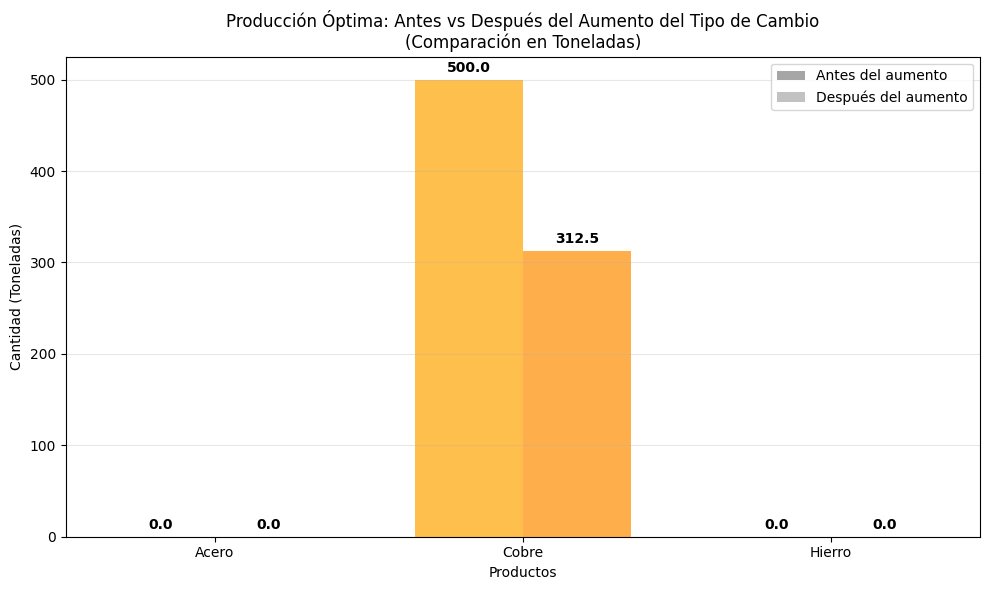

Cambio en producción total: 500.0 → 312.5 toneladas
Variación: -187.5 toneladas (-37.5%)


In [32]:
# Gráfico comparativo: antes vs después del aumento del tipo de cambio

if resultado.success and resultado_nuevo.success:
    # Preparamos los datos para el gráfico comparativo
    x_pos = np.arange(len(productos))
    ancho_barras = 0.35
    
    # Gráfico de barras comparativo
    fig, ax = plt.subplots(figsize=(10, 6))
    
    barras_antes = ax.bar(x_pos - ancho_barras/2, x_optimo, ancho_barras, 
                         label='Antes del aumento', color=['gray', 'orange', 'brown'], alpha=0.7)
    barras_despues = ax.bar(x_pos + ancho_barras/2, x_optimo_nuevo, ancho_barras, 
                           label='Después del aumento', color=['darkgray', 'darkorange', 'saddlebrown'], alpha=0.7)
    
    # Agregamos etiquetas con valores
    for i, (antes, despues) in enumerate(zip(x_optimo, x_optimo_nuevo)):
        ax.text(i - ancho_barras/2, antes + 5, f'{antes:.1f}', ha='center', va='bottom', fontweight='bold')
        ax.text(i + ancho_barras/2, despues + 5, f'{despues:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # Configuramos el gráfico
    ax.set_title('Producción Óptima: Antes vs Después del Aumento del Tipo de Cambio\n(Comparación en Toneladas)')
    ax.set_xlabel('Productos')
    ax.set_ylabel('Cantidad (Toneladas)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(productos)
    ax.legend()
    ax.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Resumen del cambio
    produccion_total_antes = x_optimo.sum()
    produccion_total_despues = x_optimo_nuevo.sum()
    cambio_total = produccion_total_despues - produccion_total_antes
    
    print(f"Cambio en producción total: {produccion_total_antes:.1f} → {produccion_total_despues:.1f} toneladas")
    print(f"Variación: {cambio_total:+.1f} toneladas ({cambio_total/produccion_total_antes*100:+.1f}%)")

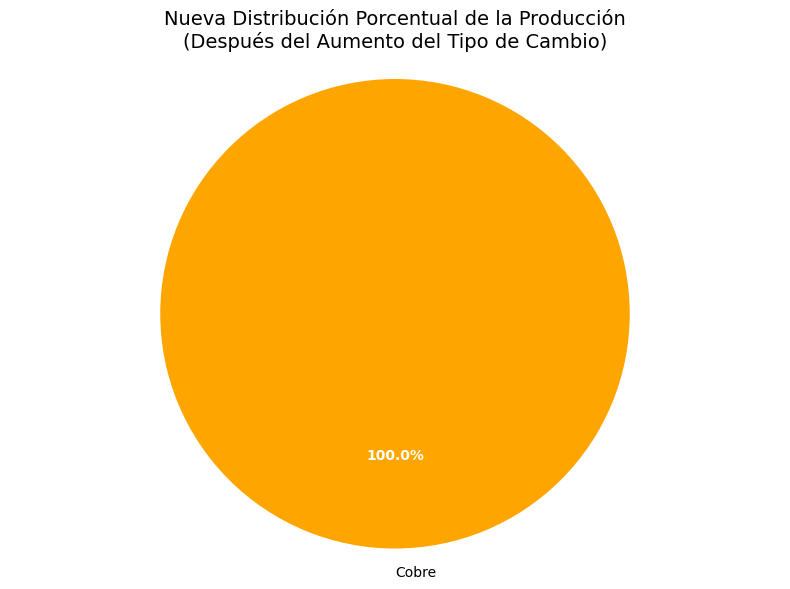

Comparación de distribución porcentual:
Producto    | Antes  | Después | Cambio
----------------------------------------
Acero       |   0.0% |    0.0% |  +0.0%
Cobre       | 100.0% |  100.0% |  +0.0%
Hierro      |   0.0% |    0.0% |  +0.0%


In [33]:
# Gráfico de torta con la nueva distribución porcentual después del aumento

if resultado_nuevo.success:
    # Calculamos los nuevos porcentajes de producción
    produccion_total_nueva = x_optimo_nuevo.sum()
    porcentajes_nuevos = (x_optimo_nuevo / produccion_total_nueva) * 100
    
    # Filtramos productos con producción > 0
    productos_producidos_nuevos = []
    porcentajes_producidos_nuevos = []
    colores_producidos_nuevos = []
    
    for i, (producto, cantidad, porcentaje) in enumerate(zip(productos, x_optimo_nuevo, porcentajes_nuevos)):
        if cantidad > 0.01:  # Solo incluir si la producción es significativa
            productos_producidos_nuevos.append(producto)
            porcentajes_producidos_nuevos.append(porcentaje)
            colores_producidos_nuevos.append(colores[i])
    
    # Gráfico de torta después del aumento
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(porcentajes_producidos_nuevos, 
                                      labels=productos_producidos_nuevos,
                                      colors=colores_producidos_nuevos,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=[0.05] * len(productos_producidos_nuevos))
    
    plt.title('Nueva Distribución Porcentual de la Producción\n(Después del Aumento del Tipo de Cambio)', fontsize=14)
    
    # Mejoramos el formato del texto
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Comparación de distribuciones
    print("Comparación de distribución porcentual:")
    print("Producto    | Antes  | Después | Cambio")
    print("-" * 40)
    for i, producto in enumerate(productos):
        antes_pct = (x_optimo[i] / x_optimo.sum()) * 100 if x_optimo.sum() > 0 else 0
        despues_pct = porcentajes_nuevos[i]
        cambio_pct = despues_pct - antes_pct
        print(f"{producto:11} | {antes_pct:5.1f}% | {despues_pct:6.1f}% | {cambio_pct:+5.1f}%")

**e) Minimización del presupuesto con nuevas restricciones**

El dueño de Techint exige:
- **Minimizar el presupuesto** (después del aumento del tipo de cambio)
- **Nueva capacidad**: máximo 800 toneladas total
- **Producción mínima**: al menos 4 ton de acero, 2 ton de cobre, 8 ton de hierro

In [34]:
# e) El dueño cambia las reglas del juego

print("e) NUEVO PROBLEMA: MINIMIZAR GASTOS")
print("="*50)
print("El dueño de Techint dice:")
print('💼 "Quiero gastar lo mínimo posible, pero manteniendo la empresa operativa"')

# i) Nuevas condiciones del problema
print("\ni) Las nuevas reglas son:")
print("   🎯 OBJETIVO: Minimizar el presupuesto (gastar lo menos posible)")
print("   📦 CAPACIDAD: Ahora solo 800 toneladas máximo (menos espacio)")
print("   ⚠️  MÍNIMOS OPERATIVOS: Para mantener la planta funcionando:")
print("      • Mínimo 4 toneladas de acero")
print("      • Mínimo 2 toneladas de cobre") 
print("      • Mínimo 8 toneladas de hierro")

print("\n📝 Formalización matemática del nuevo problema:")
print("   Variables: x_A, x_C, x_H (toneladas de acero, cobre, hierro)")
print(f"   MINIMIZAR: {costos_nuevos_acero:.1f}×A + {costos_nuevos_cobre:.1f}×C + {costos_nuevos_hierro:.1f}×H")
print("   Sujeto a:")
print("      A + C + H ≤ 800  (nueva capacidad)")
print("      A ≥ 4  (mínimo acero)")
print("      C ≥ 2  (mínimo cobre)")
print("      H ≥ 8  (mínimo hierro)")

# Configuramos el problema de minimización
print("\n🔧 Configurando el nuevo problema...")

# Ahora queremos MINIMIZAR costos (no maximizar beneficios)
c_minimizar = costos_nuevos  # Costos que queremos minimizar

# Nueva restricción: solo capacidad reducida
A_ub_minimizar = np.array([[1, 1, 1]])  # A + C + H ≤ 800
b_ub_minimizar = np.array([800])        # Nueva capacidad reducida

# Las restricciones de mínimos van en los límites de variables
limites_nuevos = [
    (4, None),  # Acero: mínimo 4, máximo sin límite
    (2, None),  # Cobre: mínimo 2, máximo sin límite  
    (8, None)   # Hierro: mínimo 8, máximo sin límite
]

print("✅ Problema configurado correctamente")

e) NUEVO PROBLEMA: MINIMIZAR GASTOS
El dueño de Techint dice:
💼 "Quiero gastar lo mínimo posible, pero manteniendo la empresa operativa"

i) Las nuevas reglas son:
   🎯 OBJETIVO: Minimizar el presupuesto (gastar lo menos posible)
   📦 CAPACIDAD: Ahora solo 800 toneladas máximo (menos espacio)
   ⚠️  MÍNIMOS OPERATIVOS: Para mantener la planta funcionando:
      • Mínimo 4 toneladas de acero
      • Mínimo 2 toneladas de cobre
      • Mínimo 8 toneladas de hierro

📝 Formalización matemática del nuevo problema:
   Variables: x_A, x_C, x_H (toneladas de acero, cobre, hierro)
   MINIMIZAR: 3.8×A + 4.8×C + 6.0×H
   Sujeto a:
      A + C + H ≤ 800  (nueva capacidad)
      A ≥ 4  (mínimo acero)
      C ≥ 2  (mínimo cobre)
      H ≥ 8  (mínimo hierro)

🔧 Configurando el nuevo problema...
✅ Problema configurado correctamente


In [35]:
# Resolvemos el problema de minimización

print("🔄 Resolviendo el problema de minimización...")

resultado_minimizar = linprog(c_minimizar, A_ub=A_ub_minimizar, b_ub=b_ub_minimizar, 
                             bounds=limites_nuevos, method='highs')

if resultado_minimizar.success:
    toneladas_acero_min = resultado_minimizar.x[0]
    toneladas_cobre_min = resultado_minimizar.x[1]
    toneladas_hierro_min = resultado_minimizar.x[2]
    presupuesto_minimo = resultado_minimizar.fun
    
    print("✅ ¡SOLUCIÓN DE MÍNIMO COSTO ENCONTRADA!")
    print("="*50)
    print("Producción mínima para mantener operativa la empresa:")
    print(f"  🔩 Acero: {toneladas_acero_min:.1f} toneladas")
    print(f"  🟠 Cobre: {toneladas_cobre_min:.1f} toneladas")
    print(f"  ⚫ Hierro: {toneladas_hierro_min:.1f} toneladas")
    print()
    print(f"💸 Presupuesto mínimo necesario: ${presupuesto_minimo:,.1f} millones")
    
    # Verificación de restricciones
    capacidad_usada_min = toneladas_acero_min + toneladas_cobre_min + toneladas_hierro_min
    porcentaje_capacidad_min = (capacidad_usada_min / 800) * 100
    
    print("\n📊 Verificación:")
    print(f"  Capacidad utilizada: {capacidad_usada_min:.1f}/800 ton ({porcentaje_capacidad_min:.1f}%)")
    print(f"  ✓ Acero: {toneladas_acero_min:.1f} ≥ 4 toneladas")
    print(f"  ✓ Cobre: {toneladas_cobre_min:.1f} ≥ 2 toneladas")
    print(f"  ✓ Hierro: {toneladas_hierro_min:.1f} ≥ 8 toneladas")
    
    # ¿Cuánto beneficio obtendríamos con esta producción mínima?
    beneficio_minimo = (beneficios_acero * toneladas_acero_min + 
                       beneficios_cobre * toneladas_cobre_min + 
                       beneficios_hierro * toneladas_hierro_min)
    
    print(f"\n💰 Beneficio con producción mínima: ${beneficio_minimo:,.1f} millones")
    
    # Comparación con los problemas anteriores
    print("\n📈 COMPARACIÓN DE LOS TRES ESCENARIOS:")
    print("  1️⃣  Problema original:")
    print(f"      Beneficio: ${beneficio_maximo:,.1f} millones")
    print("  2️⃣  Con aumento de costos:")
    print(f"      Beneficio: ${beneficio_maximo_nuevo:,.1f} millones")
    print("  3️⃣  Minimizando presupuesto:")
    print(f"      Beneficio: ${beneficio_minimo:,.1f} millones")
    print(f"      Presupuesto: ${presupuesto_minimo:,.1f} millones")
    
    # Guardamos resultados
    x_optimo_min = resultado_minimizar.x
    
    print("\n💡 Conclusión:")
    print("  Si el dueño quiere minimizar gastos, necesita al menos")
    print(f"  ${presupuesto_minimo:,.1f} millones para mantener la empresa operativa")
    
else:
    print("❌ No se pudo encontrar una solución de mínimo costo")
    print(f"Razón: {resultado_minimizar.message}")

🔄 Resolviendo el problema de minimización...
✅ ¡SOLUCIÓN DE MÍNIMO COSTO ENCONTRADA!
Producción mínima para mantener operativa la empresa:
  🔩 Acero: 4.0 toneladas
  🟠 Cobre: 2.0 toneladas
  ⚫ Hierro: 8.0 toneladas

💸 Presupuesto mínimo necesario: $72.8 millones

📊 Verificación:
  Capacidad utilizada: 14.0/800 ton (1.8%)
  ✓ Acero: 4.0 ≥ 4 toneladas
  ✓ Cobre: 2.0 ≥ 2 toneladas
  ✓ Hierro: 8.0 ≥ 8 toneladas

💰 Beneficio con producción mínima: $112.0 millones

📈 COMPARACIÓN DE LOS TRES ESCENARIOS:
  1️⃣  Problema original:
      Beneficio: $5,000.0 millones
  2️⃣  Con aumento de costos:
      Beneficio: $3,125.0 millones
  3️⃣  Minimizando presupuesto:
      Beneficio: $112.0 millones
      Presupuesto: $72.8 millones

💡 Conclusión:
  Si el dueño quiere minimizar gastos, necesita al menos
  $72.8 millones para mantener la empresa operativa


ii) VISUALIZACIÓN DEL NUEVO PROBLEMA:
Veamos gráficamente cómo cambió el espacio de soluciones
(Mostramos Acero vs Cobre, manteniendo Hierro fijo en su mínimo = 8)


/tmp/ipykernel_230295/3062538706.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(A_mesh, C_mesh, nueva_region.astype(int),


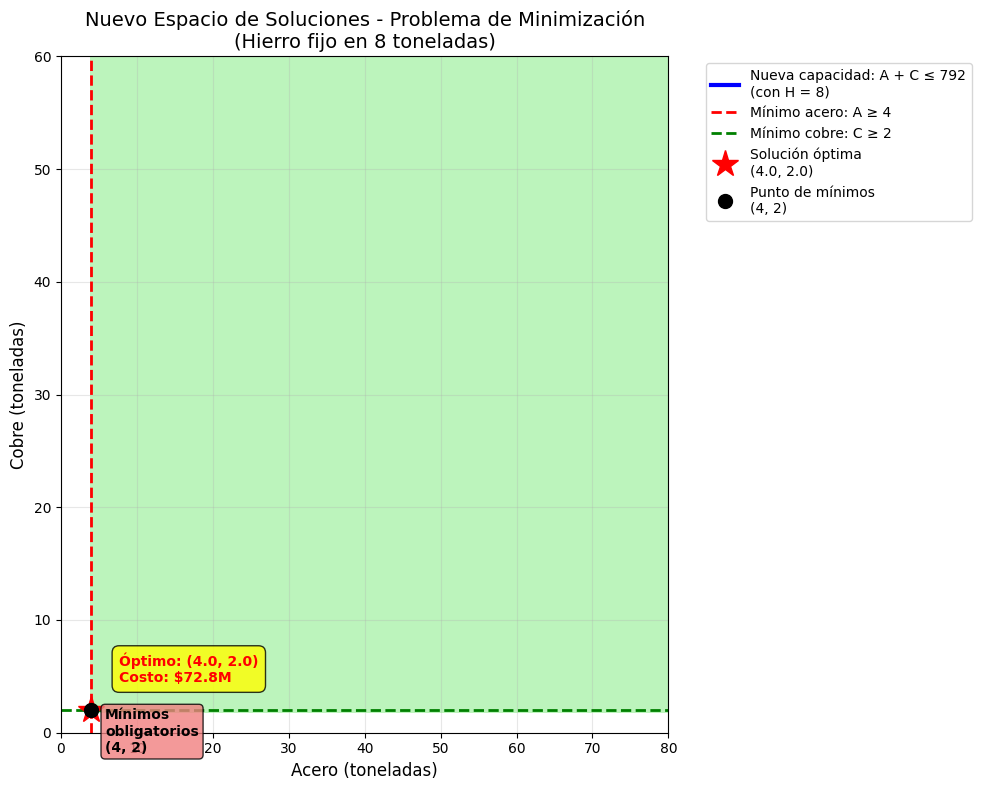


💡 Interpretación del nuevo gráfico:
  🟢 Zona verde = Combinaciones que cumplen todas las nuevas restricciones
  🔵 Línea azul = Nuevo límite de capacidad (más restrictivo)
  🔴🟢 Líneas punteadas = Producciones mínimas obligatorias
  ⭐ Estrella roja = Solución que minimiza el costo
  ⚫ Punto negro = Punto de mínimos obligatorios

📊 Análisis final:
  La solución óptima está en (4.0, 2.0, 8.0)
  Esto significa producir lo mínimo necesario para mantener operativa la empresa
  El costo mínimo es $72.8 millones


In [36]:
# ii) Visualización del nuevo espacio de soluciones (versión estudiantil)

if resultado_minimizar.success:
    print("ii) VISUALIZACIÓN DEL NUEVO PROBLEMA:")
    print("="*50)
    print("Veamos gráficamente cómo cambió el espacio de soluciones")
    print("(Mostramos Acero vs Cobre, manteniendo Hierro fijo en su mínimo = 8)")
    
    # Creamos el gráfico del nuevo problema
    plt.figure(figsize=(10, 8))
    
    # Definimos los rangos (más pequeños por la nueva capacidad)
    acero_min_rango = np.linspace(4, 100, 100)  # Desde el mínimo requerido
    
    # Nueva restricción de capacidad con hierro fijo en 8
    # A + C + 8 ≤ 800, entonces: C ≤ 792 - A
    cobre_nueva_capacidad = 792 - acero_min_rango
    
    # Graficamos las nuevas restricciones
    plt.plot(acero_min_rango, cobre_nueva_capacidad, 'b-', linewidth=3, 
             label='Nueva capacidad: A + C ≤ 792\n(con H = 8)')
    
    # Líneas de restricciones mínimas
    plt.axvline(x=4, color='red', linestyle='--', linewidth=2, 
                label='Mínimo acero: A ≥ 4')
    plt.axhline(y=2, color='green', linestyle='--', linewidth=2, 
                label='Mínimo cobre: C ≥ 2')
    
    # Sombreamos la nueva región factible
    acero_mesh_min = np.linspace(0, 100, 200)
    cobre_mesh_min = np.linspace(0, 100, 200)
    A_mesh, C_mesh = np.meshgrid(acero_mesh_min, cobre_mesh_min)
    
    nueva_region = ((C_mesh <= 792 - A_mesh) & 
                   (A_mesh >= 4) & (C_mesh >= 2))
    
    plt.contourf(A_mesh, C_mesh, nueva_region.astype(int), 
                levels=[0.5, 1.5], colors=['lightgreen'], alpha=0.6, 
                label='Nueva región factible')
    
    # Marcamos la solución óptima del problema de minimización
    plt.plot(x_optimo_min[0], x_optimo_min[1], 'r*', markersize=20, 
             label=f'Solución óptima\n({x_optimo_min[0]:.1f}, {x_optimo_min[1]:.1f})')
    
    # Marcamos el punto de mínimos obligatorios
    plt.plot(4, 2, 'ko', markersize=10, 
             label='Punto de mínimos\n(4, 2)')
    
    # Añadimos algunas anotaciones útiles
    plt.annotate(f'Óptimo: ({x_optimo_min[0]:.1f}, {x_optimo_min[1]:.1f})\nCosto: ${presupuesto_minimo:.1f}M', 
                xy=(x_optimo_min[0], x_optimo_min[1]), xytext=(20, 20), 
                textcoords='offset points', fontweight='bold', color='red',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8))
    
    plt.annotate('Mínimos\nobligatorios\n(4, 2)', 
                xy=(4, 2), xytext=(10, -30), 
                textcoords='offset points', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))
    
    # Configuramos el gráfico
    plt.xlim(0, 80)
    plt.ylim(0, 60)
    plt.xlabel('Acero (toneladas)', fontsize=12)
    plt.ylabel('Cobre (toneladas)', fontsize=12)
    plt.title('Nuevo Espacio de Soluciones - Problema de Minimización\n(Hierro fijo en 8 toneladas)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Interpretación del nuevo gráfico:")
    print("  🟢 Zona verde = Combinaciones que cumplen todas las nuevas restricciones")
    print("  🔵 Línea azul = Nuevo límite de capacidad (más restrictivo)")
    print("  🔴🟢 Líneas punteadas = Producciones mínimas obligatorias") 
    print("  ⭐ Estrella roja = Solución que minimiza el costo")
    print("  ⚫ Punto negro = Punto de mínimos obligatorios")
    
    print("\n📊 Análisis final:")
    print(f"  La solución óptima está en ({x_optimo_min[0]:.1f}, {x_optimo_min[1]:.1f}, {x_optimo_min[2]:.1f})")
    print("  Esto significa producir lo mínimo necesario para mantener operativa la empresa")
    print(f"  El costo mínimo es ${presupuesto_minimo:.1f} millones")